<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [153]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [154]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [155]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [156]:
iris=pd.read_csv('iris.data',header=None)
iris.head()

0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

In [168]:
irf=iris.dtypes==float
irf.array

<PandasArray>
[True, True, True, True, False]
Length: 5, dtype: bool

In [158]:
iris.columns=['sepal_lenght','sepal_width','petal_lenght','petal_width','species']
iris.dropna(how='all',inplace=True)
iris.head()

sepal_lenght  sepal_width  petal_lenght  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [159]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_lenght  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Task 3: Visualize the Data
---

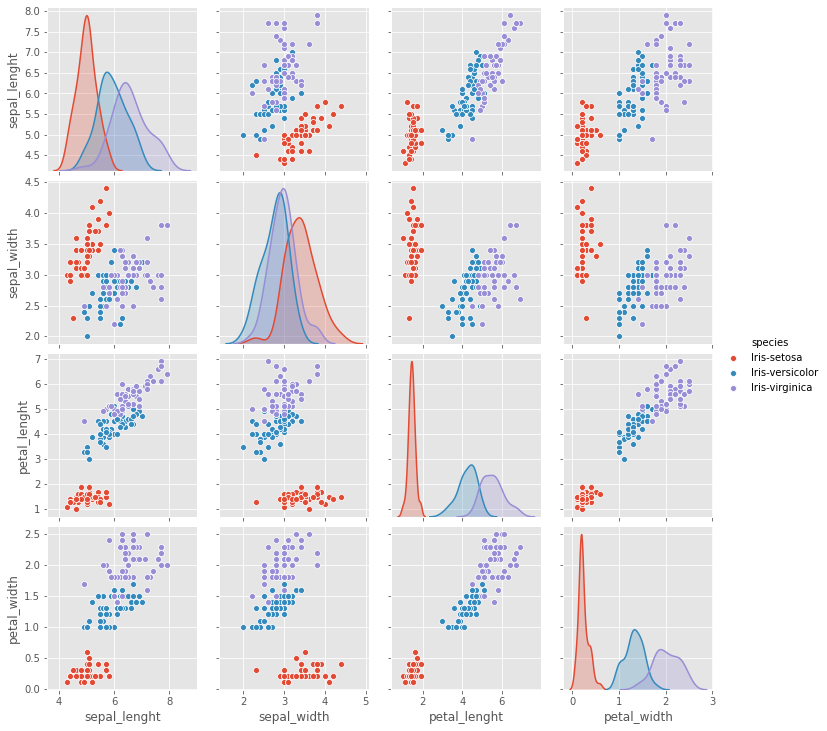

In [160]:
sns.pairplot(iris,hue='species')

### Task 4: Standardize the Data
---

In [172]:
from sklearn.preprocessing import StandardScaler

x=iris.iloc[:,(iris.dtypes==float).array or (iris.dtypes==int).array].values
y=iris.species.values

X=StandardScaler().fit_transform(x)

In [98]:
print(iris)
print(X)

     sepal_lenght  sepal_width  petal_lenght  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [48]:
CovMat=np.cov(X.T)
CovMat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [55]:
EigVal, EigVect=np.linalg.eig(CovMat)
print(EigVect,'\n\n',EigVal)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

 [2.93035378 0.92740362 0.14834223 0.02074601]


In [67]:
EigVect.dot(np.eye(EigVal.size)*EigVal).dot(np.linalg.inv(EigVect))


array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

### Task 6: Singular Value Decomposition (SVD)
---

In [69]:
EigVec_SVD, S, V=np.linalg.svd(X.T)
EigVec_SVD


array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

### Task 7: Picking Principal Components Using the Explained Variance
---

In [71]:
VarExplained=[(i/sum(EigVal))*100 for i in EigVal]
VarExplained

[72.77045209380137, 23.03052326768064, 3.683831957627374, 0.5151926808906345]

In [81]:
CumVarExplained=np.cumsum(VarExplained)
CumVarExplained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

In [82]:
np.insert(CumVarExplained,0,[0])

array([  0.        ,  72.77045209,  95.80097536,  99.48480732,
       100.        ])

In [85]:
sns.lineplot([0,1,2,3,4],np.insert(CumVarExplained,0,[0]))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xlim([0,4])
plt.ylim([0,110])
plt.title("Explained variance vs Number of components")
plt.show()

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [90]:
EigVect

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [96]:
ProjMatrix=EigVect[:,:2]

ProjMatrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [110]:
X_pca=X.dot(ProjMatrix)
X_pca

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

In [180]:
iris.species.unique()
y==iris.species.unique()[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

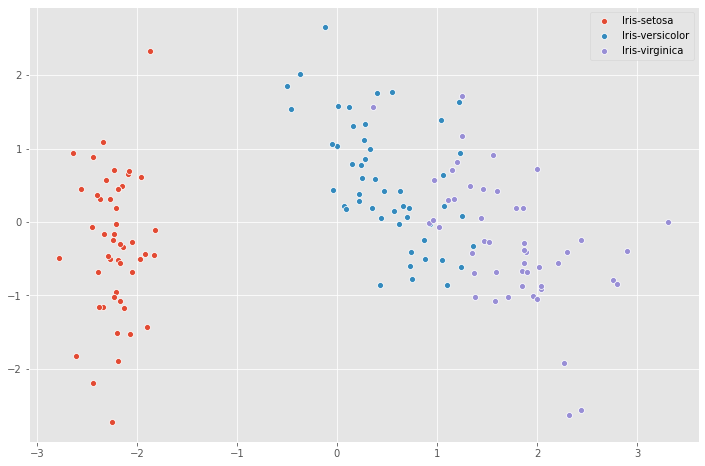

In [119]:
for species in iris.species.unique():
    sns.scatterplot(X_pca[y==species,0],X_pca[y==species,1])
plt.legend(iris.species.unique())

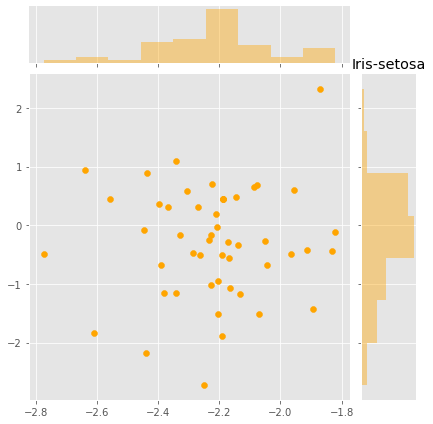

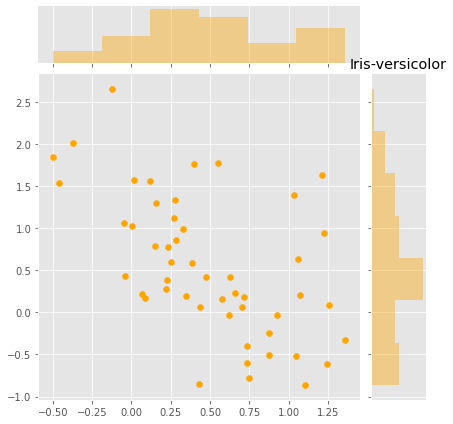

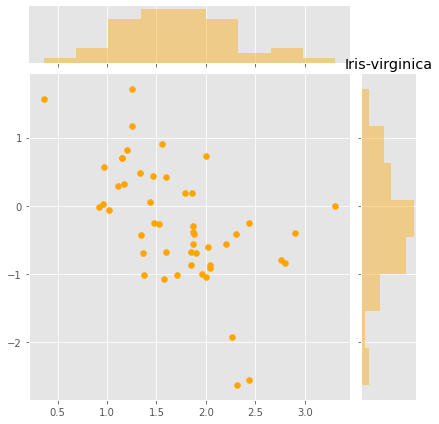

In [143]:
for species in iris.species.unique():
    sns.jointplot(X_pca[y==species,0],X_pca[y==species,1],color='orange')
    plt.title(species)
